In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:

def extract_data_from_npz(npz_path):
    # This function opens an npz file and extracts two pieces of information.
    # You need to replace 'key1' and 'key2' with the actual keys you're interested in.
    with np.load(npz_path) as data:
        info1 = data['poisson']
        info2 = data['perturbation']

    return info1, info2

def find_and_extract_npz(root_path):
    # Initialize lists to store the extracted information
    info1_list = []
    info2_list = []

    
    for root, dirs, files in os.walk(root_path):
        for file in files:
            if file.endswith('.npz'):
                npz_path = os.path.join(root, file)
                info1, info2 = extract_data_from_npz(npz_path)
                
                # Append the extracted information to the lists
                info1_list.append(info1)
                info2_list.append(info2)

                
    # At this point, info1_list and info2_list contain all the extracted information
    # You can return them, save them, or process them further as needed
    return info1_list, info2_list, info3_list

# Replace 'your/root/directory/path' with the path to the directory you want to start from
root_path = './'
info1_list, info2_list = find_and_extract_npz(root_path)

# Concatenate the lists so each of the first entries becomes different columns
for info1, info2, info3 in zip(info1_list, info2_list):
    print(f"{info1}, {info2}")



KeyError: 'poisson is not a file in the archive'

In [3]:
perturbation_list = [0.1, 0.2, 0.5, 0.8, 1.0, 1.5, 1.8, 2.0, 2.3, 2.5]

results = []
for perturbation in perturbation_list:
    for i in range(5):
        file = np.load(str(perturbation)+'/'+str(i)+'.npz')
        results.append([perturbation, file['bandgap_contrast'], file['exit_flag'], file['forbidden_states_init'], file['forbidden_states_final']])
        
    
results = np.array(results)
print(results)

[[  0.1         -1.31180942   0.          11.           9.        ]
 [  0.1         -0.78937358   1.          12.          11.        ]
 [  0.1         -0.9617727    1.          12.          11.        ]
 [  0.1         -1.6158041    0.          14.          11.        ]
 [  0.1         -1.01997501   1.          12.          11.        ]
 [  0.2         -2.53449776   1.          13.          10.        ]
 [  0.2         -1.34630398   1.          11.           9.        ]
 [  0.2         -2.0588688    1.          10.           8.        ]
 [  0.2         -1.86654093   1.          11.          10.        ]
 [  0.2         -1.2666386    1.          11.          10.        ]
 [  0.5         -6.12938535   1.          14.           8.        ]
 [  0.5         -2.968017     1.          11.           7.        ]
 [  0.5         -4.770131     1.          13.           7.        ]
 [  0.5         -4.68519825   1.          14.           7.        ]
 [  0.5         -3.42163694   1.          13.   

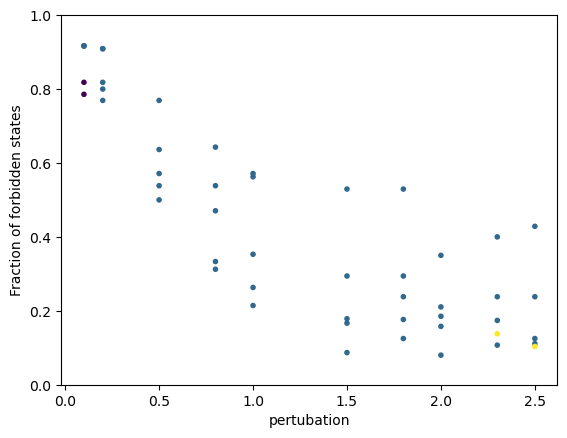

In [6]:
plt.scatter(results[:,0],results[:,4]/results[:,3], c=results[:,2], marker='.')
plt.ylim(0,1)
plt.xlabel('pertubation')
plt.ylabel('Fraction of forbidden states')
#plt.gca().set_aspect(10, adjustable='box')

plt.savefig('results_forbidden_states_fraction.jpg')
plt.show()

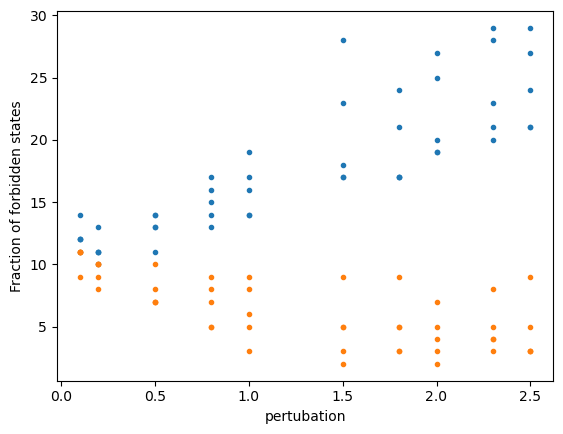

In [9]:
plt.scatter(results[:,0], results[:,3], marker='.')
plt.scatter(results[:,0], results[:,4], marker='.')

plt.xlabel('pertubation')
plt.ylabel('Fraction of forbidden states')
#plt.gca().set_aspect(10, adjustable='box')

plt.savefig('results_forbidden_states_fraction.jpg')
plt.show()

/home/bylehn/ipykernel_1993542/3577140198.py:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(results[:,0], results[:,2], cmap = 'jet', marker='.')


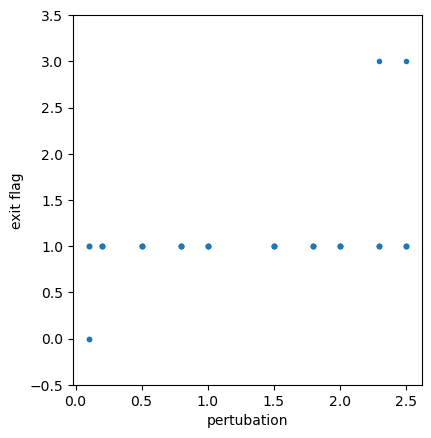

In [5]:
plt.scatter(results[:,0], results[:,2], cmap = 'jet', marker='.')
plt.ylim(-0.5 , 3.5)
plt.xlabel('pertubation')
plt.ylabel('exit flag')
plt.gca().set_aspect(0.7, adjustable='box')

plt.savefig('exit_flags.jpg')
plt.show()